In [1]:
import numpy as np
import h5py
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import yaml
import argparse
import scipy.optimize

sys.path.append('../')
import utils
import settings
plt.style.use('../spectrum.mplstyle')

In [4]:
n=10
all_data = {
#     "G1(4)": {
#         "levels": "G1(4)_levels.csv",
#         "reduced_levels": "G1(4)_noD_levels.csv",
#         "level_inserts": "G1(4)_noD_level_inserts_n10.csv",
#     },
#     "Hg(0)": {
#         "levels": "Hg(0)_levels.csv",
#         "reduced_levels": "Hg(0)_noD_levels.csv",
#         "level_inserts": "Hg(0)_noD_level_inserts.csv",
#     },
#     "G2(1)": {
#         "levels": "G2(1)_levels.csv",
#         "reduced_levels": "G2(1)_noD_levels.csv",
#         "level_inserts": "G2(1)_noD_level_inserts.csv",
#     },
#     "F2(3)": {
#         "levels": "F2(3)_levels.csv",
#         "reduced_levels": "F2(3)_noD_levels.csv",
#         "level_inserts": "F2(3)_noD_level_inserts.csv",
#     },
    "G(3)": {
        "levels": "G(3)_levels.csv",
        "reduced_levels": "G(3)_noD_levels.csv",
        "level_inserts": "G(3)_noD_level_inserts.csv",
    },
    
}

<Figure size 640x480 with 0 Axes>

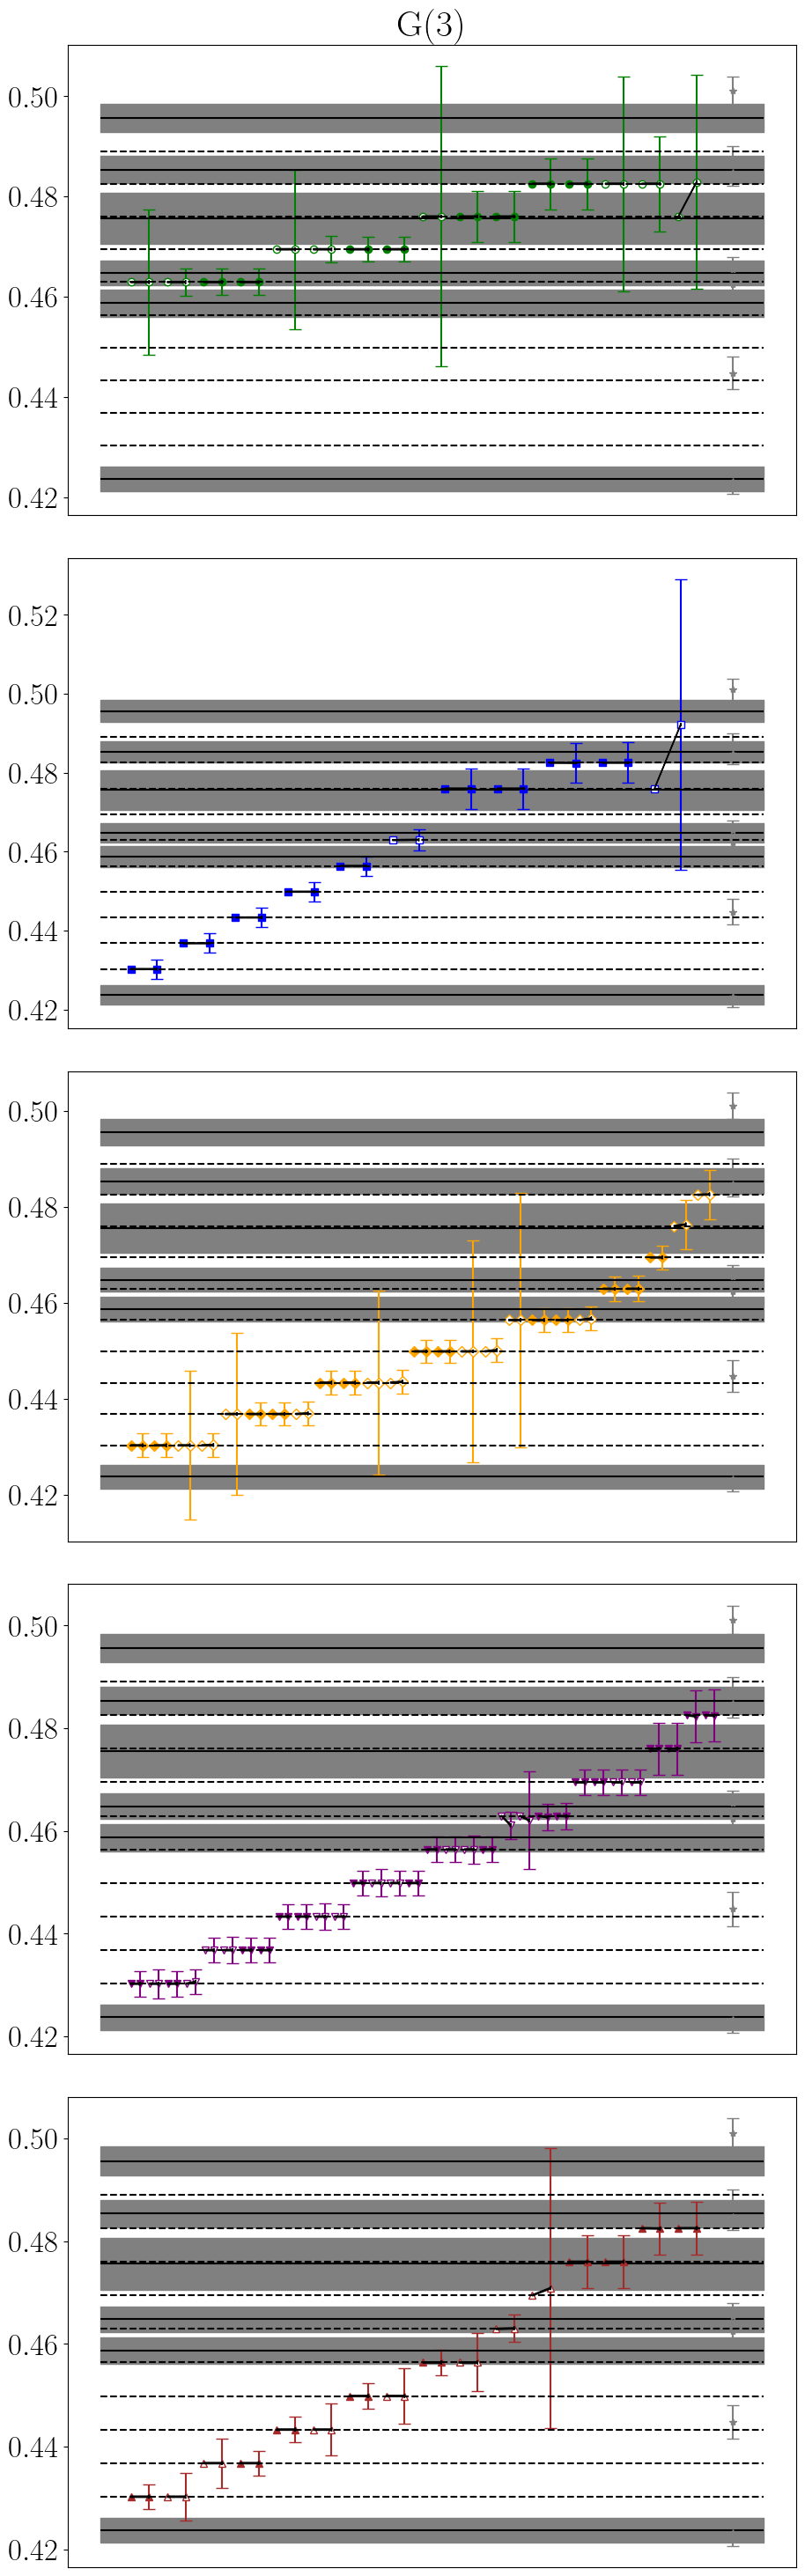

In [5]:
# i=0

f = plt.figure()

for plots in all_data:
    
    min_level = 500
    max_level = 0.0
    level_inserts = pd.read_csv(all_data[plots]["level_inserts"])
    n_plots = int(max(level_inserts['corr'])+1)
    f, axes = plt.subplots(n_plots, 1)
    f.set_figwidth(10)
    f.set_figheight(6*n_plots)

    full_spec = pd.read_csv(all_data[plots]["levels"])
    levels = pd.read_csv(all_data[plots]["reduced_levels"])

    x=[0.0]*n_plots
    d=0.3
    for index,row in level_inserts.iterrows():
        ic = int(row['corr'])
        if row['prior']:
            mfc = settings.colors[ic]
        else:
            mfc = "white"
        axes[ic].plot(x[ic],row['insert'], linewidth=0.0,color=settings.colors[ic], marker=settings.markers[ic],mfc=mfc)
        axes[ic].errorbar(x=x[ic]+d,y=row['energy'],yerr=row['energyerr'], linewidth=0.0, capsize=5, elinewidth=1.5,color=settings.colors[ic], marker=settings.markers[ic],mfc=mfc)
        axes[ic].arrow(x[ic],row['insert'],d,row['energy']-row['insert'],width=0.00025,zorder=4,ec=None, color="black")
        x[ic]+=2*d
        
        
    for i in range(n_plots):
        xall = [x[i]+d]*len(full_spec['energy'])
        axes[i].errorbar(x=xall,y=full_spec['energy'],yerr=full_spec['energyerr'], linewidth=0.0, capsize=5, elinewidth=1.5,color=settings.colors[n_plots], marker=settings.markers[n_plots])


    for i in range(n_plots):
        xrange = axes[i].get_xlim()
        for val,err in zip(levels['energy'],levels['energyerr']):
            axes[i].hlines(val,xrange[0],xrange[1],color="black")
            axes[i].fill_between(xrange,val-err,val+err,color="gray",zorder=0)
            if val<min_level:
                min_level=val
            if val>max_level:
                max_level=val

        dE = (max_level-min_level)/(n+1)
        for j in range(n):
            axes[i].hlines(min_level+dE*(j+1),xrange[0],xrange[1],color="black",ls="--", zorder = 3)
        axes[i].set_xticks([])


    axes[0].set_title(plots)
    plt.tight_layout()
    plt.savefig(f"{plots}.png")